# Exercises: Introduction to pandas
By Christopher van Hoecke, Maxwell Margenot

## Lecture Link : 
https://www.quantopian.com/lectures/introduction-to-pandas

### IMPORTANT NOTE: 
This lecture corresponds to the Introduction to Pandas lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



----

In [ ]:
# Useful Functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

----

# Exercise 1
## a. Series 
Given an array of data, please create a pandas Series `s` with a datetime index starting `2016-01-01`. The index should be daily frequency and should be the same length as the data.

In [ ]:
l = np.random.randint(1,100, size=1000)
s = pd.Series(l)

nindex = pd.date_range("2016-01-01", periods=len(s), freq="D")
s.index = nindex
print(s)

2016-01-01    92
2016-01-02    94
2016-01-03    87
2016-01-04    31
2016-01-05    26
              ..
2018-09-22    51
2018-09-23    93
2018-09-24    44
2018-09-25    86
2018-09-26    69
Freq: D, Length: 1000, dtype: int64


## b. Accessing Series Elements.
- Print every other element of the first 50 elements of series `s`.
- Find the value associated with the index `2017-02-20`.

In [ ]:
print(s.iloc[:50:2])
print(s.loc['2017-02-20'])

2016-01-01    92
2016-01-03    87
2016-01-05    26
2016-01-07    55
2016-01-09    52
2016-01-11     4
2016-01-13    84
2016-01-15    55
2016-01-17    31
2016-01-19    72
2016-01-21    13
2016-01-23    26
2016-01-25    41
2016-01-27    42
2016-01-29    20
2016-01-31    29
2016-02-02    43
2016-02-04     3
2016-02-06    82
2016-02-08    93
2016-02-10    79
2016-02-12    39
2016-02-14    73
2016-02-16    31
2016-02-18    44
Freq: 2D, dtype: int64
81


## c. Boolean Indexing.
In the series `s`, print all the values between 1 and 3.

In [ ]:
print(s.loc[(s>1) & (s<3)])

2016-03-05    2
2016-05-29    2
2016-11-11    2
2016-11-14    2
2017-08-23    2
2017-09-22    2
2017-12-09    2
2018-01-23    2
2018-03-13    2
2018-05-21    2
2018-07-06    2
dtype: int64


----

#Exercise 2 : Indexing and time series. 
###a. Display
Print the first and last 5 elements of the series `s`.

In [ ]:
print(s.head(5))
print(s.tail(5))

2016-01-01    92
2016-01-02    94
2016-01-03    87
2016-01-04    31
2016-01-05    26
Freq: D, dtype: int64
2018-09-22    51
2018-09-23    93
2018-09-24    44
2018-09-25    86
2018-09-26    69
Freq: D, dtype: int64


### b. Resampling
- Using the resample method, upsample the daily data to monthly frequency. Use the median method so that each monthly value is the median price of all the days in that month.
- Take the daily data and fill in every day, including weekends and holidays, using forward-fills. 

In [ ]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = pd.read_csv("CMG.csv")
prices = prices.set_index(pd.to_datetime(prices["Date"]))['Close']

# Resample daily prices to get monthly prices using median.
monthly_prices = prices.resample('M').median()
monthly_prices.head(24)

Date
2012-01-31    355.505005
2012-02-29    378.195007
2012-03-31    408.994996
2012-04-30    420.835007
2012-05-31    405.240006
2012-06-30    402.450012
2012-07-31    380.470001
2012-08-31    295.390015
2012-09-30    332.809998
2012-10-31    286.559998
2012-11-30    263.779999
2012-12-31    282.164994
2013-01-31    299.589996
2013-02-28    315.510010
2013-03-31    321.555008
2013-04-30    340.925003
2013-05-31    369.820007
2013-06-30    364.169998
2013-07-31    386.299988
2013-08-31    405.190002
2013-09-30    418.880005
2013-10-31    442.019989
2013-11-30    535.929993
2013-12-31    522.640015
Freq: M, Name: Close, dtype: float64

In [ ]:
# Data for every day, (including weekends and holidays)
calendar_dates = pd.date_range(start=start, end=end)
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01           NaN
2012-01-02           NaN
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
2012-01-11    347.600006
2012-01-12    347.619995
2012-01-13    354.619995
2012-01-14    354.619995
2012-01-15    354.619995
Freq: D, Name: Close, dtype: float64

----

#Exercise 3 : Missing Data
- Replace all instances of `NaN` using the forward fill method. 
- Instead of filling, remove all instances of `NaN` from the data.

In [ ]:
# Fill missing data using Backwards fill method
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01    341.269989
2012-01-02    341.269989
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
Freq: D, Name: Close, dtype: float64

In [ ]:
# Drop instances of nan in the data
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
2012-01-11    347.600006
2012-01-12    347.619995
Freq: D, Name: Close, dtype: float64

----

# Exercise 4 : Time Series Analysis with pandas
## a. General Information
Print the count, mean, standard deviation, minimum, 25th, 50th, and 75th percentiles, and the max of our series s. 

In [ ]:
print("Summary Statistics")
print(prices.describe())

Summary Statistics
count    1006.000000
mean      501.636650
std       146.688738
min       236.240005
25%       371.555001
50%       521.270019
75%       646.834991
max       757.770020
Name: Close, dtype: float64


## b. Series Operations
- Get the additive and multiplicative returns of this series. 
- Calculate the rolling mean with a 60 day window.
- Calculate the standard deviation with a 60 day window.

In [ ]:
data = pd.read_csv("GE.csv")
data = data["Open"]

mult_returns = data.pct_change()[1:]
add_returns = data.diff()[1:]

In [ ]:
# Rolling mean

rolling_mean = data.rolling(window=60).mean()
rolling_mean.name = "60-day rolling mean"

In [ ]:
# Rolling Standard Deviation
rolling_std = data.rolling(window=60).std()
rolling_std.name = "60-day rolling volatility"

----

# Exercise 5 : DataFrames
## a. Indexing
Form a DataFrame out of `dict_data` with `l` as its index.

In [ ]:
l = {'fifth','fourth', 'third', 'second', 'first'}
dict_data = {'a' : [1, 2, 3, 4, 5], 'b' : ['L', 'K', 'J', 'M', 'Z'],'c' : np.random.normal(0, 1, 5)}

# Adding l as an index to dict_data
frame_data = pd.DataFrame(dict_data, index=l)
print(frame_data)

        a  b         c
second  1  L -0.337724
fifth   2  K -0.083598
fourth  3  J -0.177862
first   4  M -1.588705
third   5  Z -0.366547


## b. DataFrames Manipulation
- Concatenate the following two series to form a dataframe. 
- Rename the columns to `Good Numbers` and `Bad Numbers`. 
- Change the index to be a datetime index starting on `2016-01-01`.

In [ ]:
s1 = pd.Series([2, 3, 5, 7, 11, 13], name='prime')
s2 = pd.Series([1, 4, 6, 8, 9, 10], name='other')

numbers = pd.concat([s1, s2], axis=1) # Concatenate the two series
numbers.columns = ['Useful Numbers', 'Not Useful Numbers'] # Rename the two columns
numbers.index = pd.date_range("2016-01-01", periods=len(numbers)) # Index change
print(numbers)

            Useful Numbers  Not Useful Numbers
2016-01-01               2                   1
2016-01-02               3                   4
2016-01-03               5                   6
2016-01-04               7                   8
2016-01-05              11                   9
2016-01-06              13                  10


----

# Exercise 6 : Accessing DataFrame elements.
## a. Columns
- Check the data type of one of the DataFrame's columns.
- Print the values associated with time range `2013-01-01` to `2013-01-10`.

In [ ]:
symbol = ["XOM", "BP", "COP", "TOT"]
start = "2012-01-01"
end = "2016-01-01"

Li = []

for i in range(len(symbol)):
    Li.append(pd.read_csv(symbol[i] + ".csv"))

prices = pd.concat(Li, axis=1, ignore_index=True)
prices = prices.iloc[:, [0, 4, 11, 18, 25]]
prices.columns = ["Date", "XOM", "BP", "COP", "TOT"]
prices.time = pd.to_datetime(prices['Date'], format='%Y-%m-%d %H:%M:%S.%f')
prices.set_index(['Date'],inplace=True)
prices

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


,XOM,BP,COP,TOT
Date,,,,
2012-01-03,86.000000,44.139999,56.541019,52.470001
2012-01-04,86.019997,44.750000,56.274208,52.270000
2012-01-05,85.760002,44.250000,55.824444,51.209999
2012-01-06,85.120003,44.080002,55.389919,50.750000
2012-01-09,85.500000,44.070000,55.603371,51.250000
...,...,...,...,...
2015-12-24,79.330002,32.119999,48.590000,45.889999
2015-12-28,78.739998,31.709999,47.189999,45.369999
2015-12-29,79.160004,31.870001,47.770000,45.849998


In [ ]:
# Print data type
print(type(prices["XOM"]))
print(type(prices.loc[:, 'XOM']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
# Print values associated with time range
prices.loc['2013-01-01':'2013-01-10']

,XOM,BP,COP,TOT
Date,,,,
2013-01-02,88.709999,42.419998,59.209999,52.570000
2013-01-03,88.550003,43.270000,59.169998,52.180000
2013-01-04,88.959999,43.660000,59.830002,52.310001
2013-01-07,87.930000,43.400002,59.169998,51.689999
2013-01-08,88.480003,43.400002,58.369999,51.580002
2013-01-09,88.139999,44.270000,58.250000,51.549999
2013-01-10,89.099998,45.009998,58.500000,52.380001


----

# Exercise 7 : Boolean Indexing
## a. Filtering.
- Filter pricing data from the last question (stored in `prices`) to only print values where:
    - BP > 30
    - XOM < 100
    - The intersection of both above conditions (BP > 30 **and** XOM < 100)
    - The union of the previous composite condition along with TOT having no `nan` values ((BP > 30 **and** XOM < 100) **or** TOT is non-`NaN`).
- Add a column for TSLA and drop the column for XOM.

In [ ]:
# Filter data 
# BP > 30
print(prices.loc[prices["BP"] > 30].head())
# XOM < 100
print(prices.loc[prices["XOM"] < 100].head())
# BP > 30 AND XOM < 100
print(prices.loc[(prices["BP"] > 30) & (prices["XOM"] < 100)].head())
# The union of (BP > 30 AND XOM < 100) with TOT being non-nan
print(prices.loc[((prices["BP"] > 30) & (prices["XOM"] < 100)) | (~ prices["TOT"].isnull())].head())

                  XOM         BP        COP        TOT
Date                                                  
2012-01-03  86.000000  44.139999  56.541019  52.470001
2012-01-04  86.019997  44.750000  56.274208  52.270000
2012-01-05  85.760002  44.250000  55.824444  51.209999
2012-01-06  85.120003  44.080002  55.389919  50.750000
2012-01-09  85.500000  44.070000  55.603371  51.250000
                  XOM         BP        COP        TOT
Date                                                  
2012-01-03  86.000000  44.139999  56.541019  52.470001
2012-01-04  86.019997  44.750000  56.274208  52.270000
2012-01-05  85.760002  44.250000  55.824444  51.209999
2012-01-06  85.120003  44.080002  55.389919  50.750000
2012-01-09  85.500000  44.070000  55.603371  51.250000
                  XOM         BP        COP        TOT
Date                                                  
2012-01-03  86.000000  44.139999  56.541019  52.470001
2012-01-04  86.019997  44.750000  56.274208  52.270000
2012-01-05

In [ ]:
# Adding TSLA 
s_1 = pd.read_csv("TSLA.csv")
s_1.set_index(['Date'],inplace=True)
s_1 = s_1["Close"]
prices.loc[:, 'TSLA'] = s_1

# Dropping XOM
prices = prices.drop('XOM', axis=1)
prices.head(5)

,BP,COP,TOT,TSLA
Date,,,,
2012-01-03,44.139999,56.541019,52.470001,5.616
2012-01-04,44.750000,56.274208,52.270000,5.542
2012-01-05,44.250000,55.824444,51.209999,5.424
2012-01-06,44.080002,55.389919,50.750000,5.382
2012-01-09,44.070000,55.603371,51.250000,5.450


## b. DataFrame Manipulation (again)
- Concatenate these DataFrames.
- Fill the missing data with 0s

In [ ]:
# Concatenate these dataframes
#df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')

L1 = []

L1.append(pd.read_csv("SPY.csv"))
L1.append(pd.read_csv("VXRT.csv"))

df_1 = pd.concat(L1, axis=1, ignore_index=True)

df_1 = df_1.iloc[:, [0, 4, 11]]
df_1.columns = ["Date", "SPY", "VXRT"]

L2 = []
#df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')

L2.append(pd.read_csv("MSFT.csv"))
L2.append(pd.read_csv("AAPL.csv"))
L2.append(pd.read_csv("GOOG.csv"))

df_2 = pd.concat(L2, axis=1, ignore_index=True)

df_2 = df_2.iloc[:, [0, 4, 11, 18]]
df_2.columns = ["Date", "MSFT", "AAPL", "GOOG"]

L3 = []

L3.append(df_1)
L3.append(df_2)

df_3 = pd.concat(L3, axis=1, ignore_index=True)

df_3 = df_3.iloc[:, [0, 1, 2, 4, 5, 6]]
df_3.columns = ["Date", "SPY", "VXRT", "MSFT", "AAPL", "GOOG"]

df_3

,Date,SPY,VXRT,MSFT,AAPL,GOOG
0,2012-01-03,127.500000,124.739998,26.770000,14.686786,331.462585
1,2012-01-04,127.699997,122.760002,27.400000,14.765714,332.892242
2,2012-01-05,128.039993,123.419998,27.680000,14.929643,328.274536
3,2012-01-06,127.709999,122.760002,28.110001,15.085714,323.796326
4,2012-01-09,128.020004,120.779999,27.740000,15.061786,310.067780
...,...,...,...,...,...,...
1001,2015-12-24,205.679993,21.340000,55.669998,27.007500,748.400024
1002,2015-12-28,205.210007,22.110001,55.950001,26.705000,762.510010
1003,2015-12-29,207.399994,21.559999,56.549999,27.184999,776.599976
1004,2015-12-30,205.929993,21.230000,56.310001,26.830000,771.000000


In [ ]:
# Fill GOOG missing data with nan
filled0_df_3 = df_3.fillna(0)
filled0_df_3.head(5)

,Date,SPY,VXRT,MSFT,AAPL,GOOG
0,2012-01-03,127.500000,124.739998,26.770000,14.686786,331.462585
1,2012-01-04,127.699997,122.760002,27.400000,14.765714,332.892242
2,2012-01-05,128.039993,123.419998,27.680000,14.929643,328.274536
3,2012-01-06,127.709999,122.760002,28.110001,15.085714,323.796326
4,2012-01-09,128.020004,120.779999,27.740000,15.061786,310.067780


----

#Variance and Standard Deviation
#Variance
Variance is a measure of dispersion. In finance, most of the time variance is a synonym for risk. The higher the variance of an asset price is, the higher risk the asset bears. Variance is usually represented by σ2, and it's calculated by

$σ^{2} = \frac{\sum_{i=1}^{n}(x_{i}−μ)^{2}}{n}$

#Standard Deviation
The most commonly used measure of dispersion in finance is standard deviation. It's usually represented by σ. It's obvious to see the relation between standard deviation and variance:

$σ=\sqrt{σ^{2}}=\sqrt{\frac{\sum_{i=1}^{n}(x_{i}−μ)^{2}}{n}}$

# Exercise 8 : Time Series Analysis
## a. Summary
- Print out a summary of the `prices` DataFrame from above.
- Take the log returns and print the first 10 values.
- Print the multiplicative returns of each company.
- Normalize and plot the returns from 2014 to 2015.
- Plot a 60 day window rolling mean of the prices.
- Plot a 60 day window rolling standfard deviation of the prices.

In [ ]:
# Summary
prices.describe()

,BP,COP,TOT,TSLA
count,1006.000000,1006.000000,1006.000000,1006.000000
mean,42.466451,63.255591,54.068310,29.493241
std,4.734563,9.160613,7.140752,17.935438
min,29.379999,42.189999,42.139999,4.558000
25%,40.400002,56.495001,49.310001,7.017000
50%,42.160000,62.295000,51.910000,35.629999
75%,45.925000,69.332497,58.267499,45.421500
max,53.380001,86.760002,73.879997,57.208000


In [ ]:
# Natural Log of the returns and print out the first 10 values
np.log(prices).head(10)

,BP,COP,TOT,TSLA
Date,,,,
2012-01-03,3.787366,4.034966,3.960242,1.725620
2012-01-04,3.801091,4.030236,3.956423,1.712355
2012-01-05,3.789855,4.022212,3.935935,1.690834
2012-01-06,3.786006,4.014398,3.926912,1.683060
2012-01-09,3.785779,4.018244,3.936716,1.695616
2012-01-10,3.793014,4.022894,3.941776,1.709102
2012-01-11,3.785552,4.005412,3.928683,1.730947
2012-01-12,3.788725,3.987901,3.915417,1.731656
2012-01-13,3.778949,3.981947,3.904596,1.516884


In [ ]:
# Multiplicative returns
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,BP,COP,TOT,TSLA
Date,,,,
2012-01-04,0.013820,-0.004719,-0.003812,-0.013177
2012-01-05,-0.011173,-0.007992,-0.020279,-0.021292
2012-01-06,-0.003842,-0.007784,-0.008983,-0.007743
2012-01-09,-0.000227,0.003854,0.009852,0.012635
2012-01-10,0.007261,0.004661,0.005073,0.013578


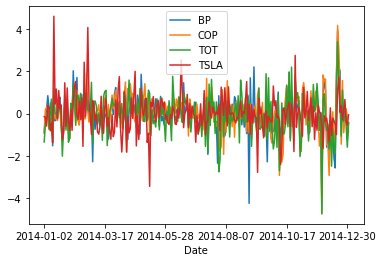

In [ ]:
# Normalizing the returns and plotting one year of data
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot()

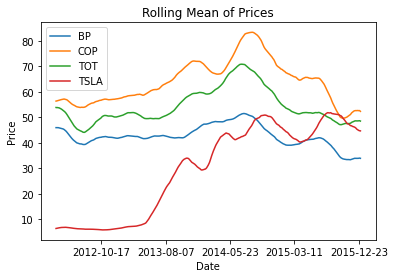

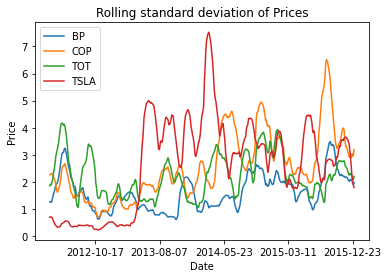

In [ ]:
# Rolling mean
rolling_mean = prices.rolling(window=60).mean()

# Rolling standard deviation
rolling_std = prices.rolling(window=60).std()

# Plotting 
mean = rolling_mean.plot();
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

std = rolling_std.plot();
plt.title("Rolling standard deviation of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

---

Congratulations on completing the Introduction to pandas exercises!

As you learn more about writing trading algorithms and the Quantopian platform, be sure to check out the daily [Quantopian Contest](https://www.quantopian.com/contest), in which you can compete for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) Tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*